In [1]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots
import pandas as pd
import xarray as xr

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [3]:
## Load handler and pass settings
hdlr = handler.Handler(settings_path)

## Initiate variables
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)

## Make grid and load data on grid 
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)

## Get ocean mask 
lm = gr.get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

# ## Load storms conv mcs here
# st = storm_tracker.StormTracker(gr, label_var_id = "Conv_MCS_label", overwrite = False)
# ##
# jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing


## New load_toocan test


In [4]:
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite_storms = True)

Loading storms...
Loading storms again because overwrite_storms is True
making ds storms ...

<class 'list'>
Label wise attributes  ['DCS_number', 'INT_TbMin', 'INT_UTC_timeEnd', 'INT_UTC_timeInit', 'INT_classif', 'INT_classif_JIRAK', 'INT_classif_MADDOX', 'INT_distance', 'INT_duration', 'INT_latEnd', 'INT_latInit', 'INT_latmax', 'INT_latmin', 'INT_localtime_End', 'INT_localtime_Init', 'INT_lonEnd', 'INT_lonInit', 'INT_lonmax', 'INT_lonmin', 'INT_qltyDCS', 'INT_surfcumkm2_241K', 'INT_surfmaxPix_241K', 'INT_surfmaxkm2_200K', 'INT_surfmaxkm2_210K', 'INT_surfmaxkm2_220K', 'INT_surfmaxkm2_241K', 'INT_velocityAvg']
Label's Lifecycle wise attributes  ['LC_UTC_time', 'LC_ecc_220K', 'LC_ecc_241K', 'LC_lat', 'LC_localtime', 'LC_lon', 'LC_orientation_220K', 'LC_orientation_241K', 'LC_smajor_220K', 'LC_smajor_241K', 'LC_sminor_220K', 'LC_sminor_241K', 'LC_surfPix_210K', 'LC_surfPix_241K', 'LC_surfkm2_200K', 'LC_surfkm2_210K', 'LC_surfkm2_220K', 'LC_surfkm2_241K', 'LC_tb_90th', 'LC_tbavg_200K', 'L

# Bin fraction of convective MCS

## Convective MCS only 

In [4]:
## Load storms that are in convective phase
st = storm_tracker.StormTracker(gr, label_var_id = "Conv_MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

KeyboardInterrupt: 

/home/mcarenso/code/tempest/tempest/joint_distrib.py:718: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


(<AxesSubplot:xlabel='mean_unweighted_Prec', ylabel='cond_alpha_50_Prec'>,
 <matplotlib.colorbar.Colorbar at 0x153d63be3d30>)

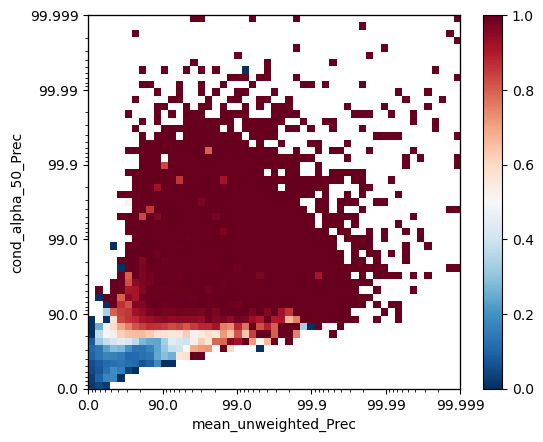

In [ ]:
%matplotlib inline
data, noise, count = jd.get_mcs_bin_fraction(region_mask = None, bin_noise_treshold= 0)
jd.plot_data(data, noise, vbds = (0,1))

In [ ]:
conv_mcs = gr.get_var_id_ds("Conv_MCS_label")
conv_mcs
# THIS BUILDS ALL THE VAR FROM REL_SURFACE BY SUPPRESING MCS DIMENSION

# ds_mcs = gr.get_var_id_ds("Conv_MCS_label").sortby("days")
# ds_mcs["MCS_rel_occupation"] = ds_mcs["Rel_surface"].sum(dim='MCS')
# ds_mcs["max_MCS_rel_surf"] = ds_mcs["Rel_surface"].max(dim='MCS')
# weights = ds_mcs["Rel_surface"]
# square_weights =weights**2 
# root_weights = np.sqrt(weights)
# ds_mcs["avg_MCS_rel_surf"] = ds_mcs["Rel_surface"].mean(dim ='MCS')
# ds_mcs["root_weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * root_weights).sum(dim ='MCS')) / root_weights.sum(dim='MCS')
# ds_mcs["square_weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * square_weights).sum(dim ='MCS')) / square_weights.sum(dim='MCS')
# ds_mcs["weight_avg_MCS_rel_surf"] = ((ds_mcs["Rel_surface"] * weights).sum(dim ='MCS')) / weights.sum(dim='MCS')

# import os 
# file_mcs_ds = gr.get_var_ds_file("Conv_MCS_label")
# os.remove(file_mcs_ds)
# ds_mcs.to_netcdf(file_mcs_ds)

# ds_mcs.Conv_Rel_surface[30, 120, 10].values
# ds_mcs.MCS_rel_occupation[30, 120, 10].values
# ds_mcs.max_MCS_rel_surf[30, 120, 10]

<xarray.Dataset>
Dimensions:                         (lat_global: 60, lon_global: 360, days: 20,
                                     MCS: 300)
Coordinates:
  * lat_global                      (lat_global) float64 -29.5 -28.5 ... 29.5
  * lon_global                      (lon_global) float64 0.5 1.5 ... 358.5 359.5
  * days                            (days) object '16-08-21' ... '16-09-09'
  * MCS                             (MCS) int64 0 1 2 3 4 ... 296 297 298 299
Data variables: (12/18)
    global_pixel_surf               (lat_global, lon_global, days) float64 ...
    Conv_MCS_label                  (lat_global, lon_global, days, MCS) float64 ...
    Rel_surface                     (lat_global, lon_global, days, MCS) float64 ...
    MCS_rel_occupation              (lat_global, lon_global, days) float64 ...
    max_MCS_rel_surf                (lat_global, lon_global, days) float64 ...
    avg_MCS_rel_surf                (lat_global, lon_global, days) float64 ...
    ...                              ...
    growth_rate_surf_adj            (lat_global, lon_global, days) float64 ...
    norm_growth_rate_surf_adj       (lat_global, lon_global, days) float64 ...
    s_max_surf_adj                  (lat_global, lon_global, days) float64 ...
    growth_rate_surf_fro_adj        (lat_global, lon_global, days) float64 ...
    norm_growth_rate_surf_fro_adj   (lat_global, lon_global, days) float64 ...
    s_max_surf_fro_adj              (lat_global, lon_global, days) float64 ...

## MCS relative occupation has a clear scaling with mean_precip, kinda similar behavior than precip, Maybe add that into rain morphology subsection

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


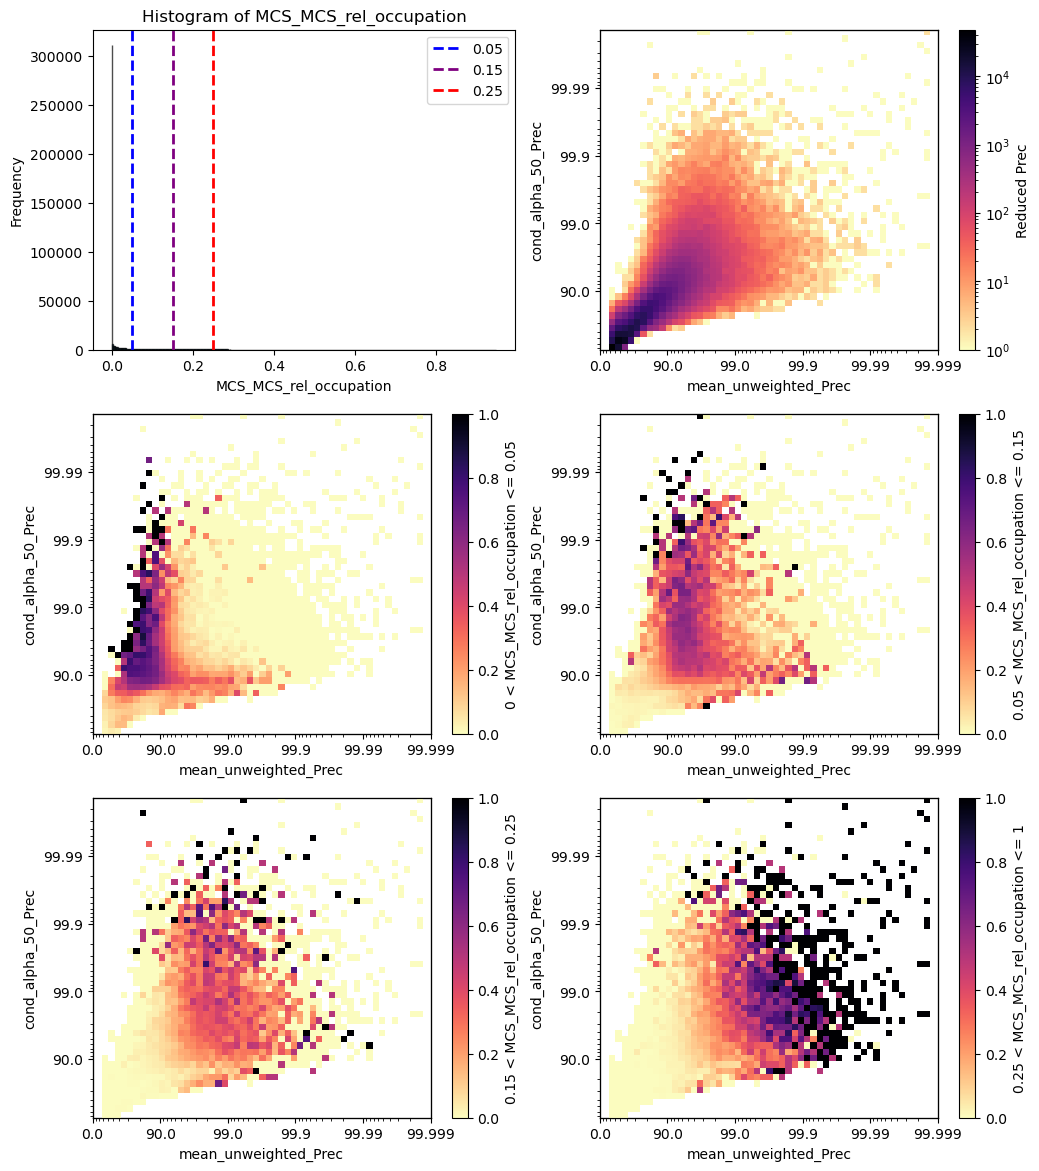

In [ ]:
%matplotlib inline
var = "MCS_rel_occupation"
var_cond_list = [0, 0.05, 0.15, 0.25, 1]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## While average MCS rel surface scales with both extreme types, it seems that growth rate and s_max scales more with km-scale extremes

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


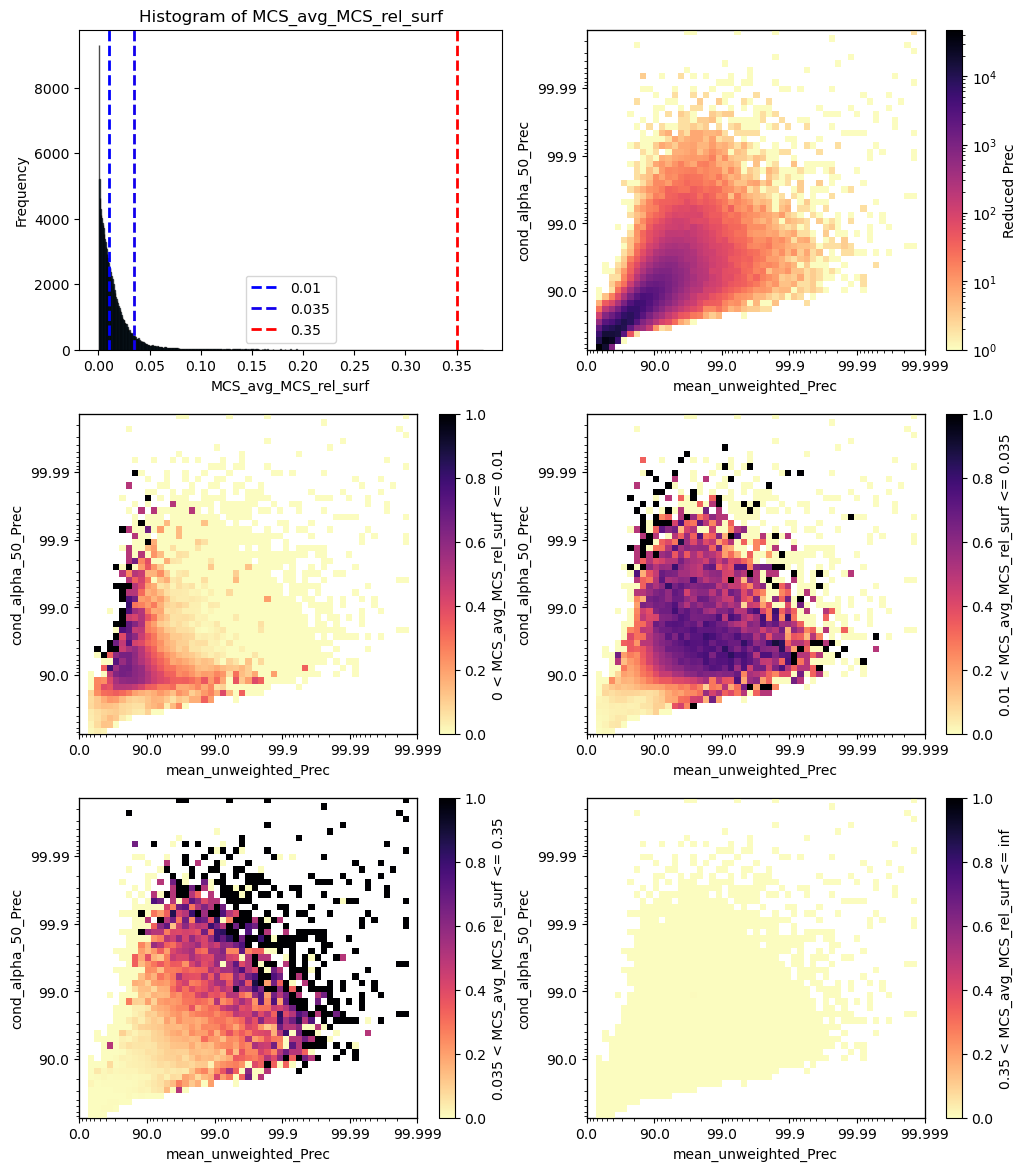

In [ ]:
%matplotlib inline
var = "avg_MCS_rel_surf"
var_cond_list = [0, 0.01,  0.035, 0.35, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## Build 1/A dA/dt

In [ ]:
# import xarray as xr
# import os 

# output_file_path = st.file_storms  # Specify your desired output file path here
# ds_storms = xr.open_dataset(output_file_path)
# ds_storms['norm_growth_rate'] = ds_storms['growth_rate'] / ds_storms['s_max']
# ds_storms['norm_growth_rate'] = ds_storms['norm_growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1), np.nan)
# ds_storms['norm_growth_rate'] = ds_storms['norm_growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1), np.nan)

# os.remove(output_file_path)
# ds_storms.to_netcdf(output_file_path)

In [ ]:
# jd.add_mcs_var_from_labels("norm_growth_rate") # 14min
# ds_mcs

## propagate growth rate to grid with conv_mcs

### Here we must actually clean growth_rate based on r score and a norm growth_rate between 0 and 1 . 

In [ ]:
ds_storms = xr.open_dataset(st.file_storms)
ds_storms.close()

In [ ]:
### This takes 43min
# import os 

# output_file_path = st.file_storms  # Specify your desired output file path here
# ds_storms = xr.open_dataset(output_file_path)
# ds_storms['norm_growth_rate'] = ds_storms['growth_rate'] / ds_storms['s_max']
# ds_storms['growth_rate'] = ds_storms['growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1) & (ds_storms['r_squared'] >= 0.8) , np.nan)
# ds_storms['s_max'] = ds_storms['s_max'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1) & (ds_storms['r_squared'] >= 0.8) , np.nan)
# # ds_storms['norm_growth_rate'] = ds_storms['norm_growth_rate'].where((ds_storms['norm_growth_rate'] >= 0) & (ds_storms['norm_growth_rate'] <= 1), np.nan)

# os.remove(output_file_path)
# ds_storms.to_netcdf(output_file_path)

## Surface adjsuted as I don't want to see mcs rel_surface signal in every variable 

In [ ]:
# jd.add_mcs_var_from_labels("growth_rate", norm_rel_surf = True, compat='override')
# # jd.add_mcs_var_from_labels("norm_growth_rate", norm_rel_surf = True, compat='override')
# jd.add_mcs_var_from_labels("s_max", norm_rel_surf = True, compat='override')

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


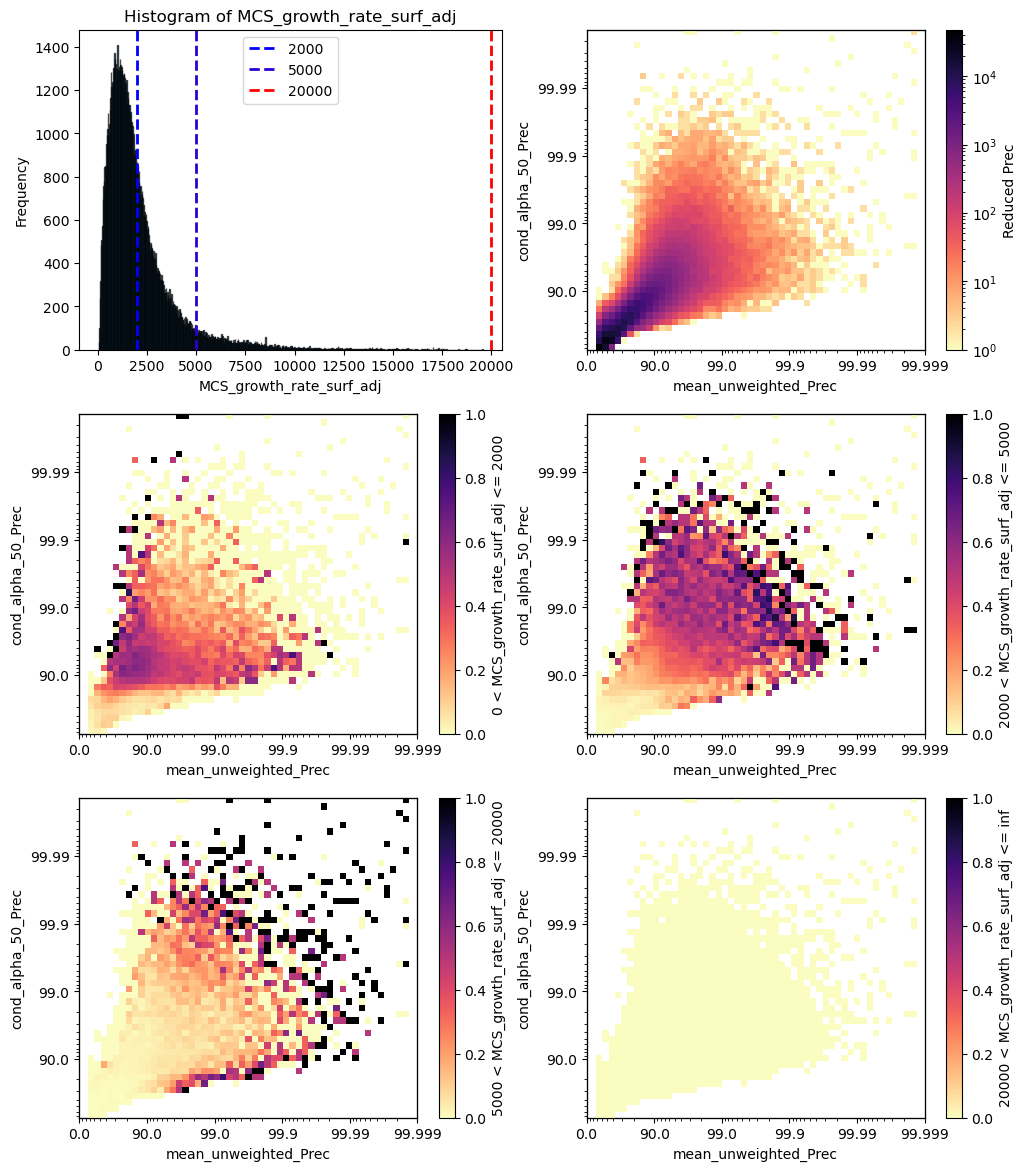

In [ ]:
%matplotlib inline
var = "growth_rate_surf_adj"
var_cond_list = [0, 2000, 5000, 20000, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")


In [ ]:
# %matplotlib inline
# var = "norm_growth_rate_surf_adj"
# var_cond_list = [0, 0.08, 0.12, 0.16, 0.24, 0.32,  0.5,  1]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


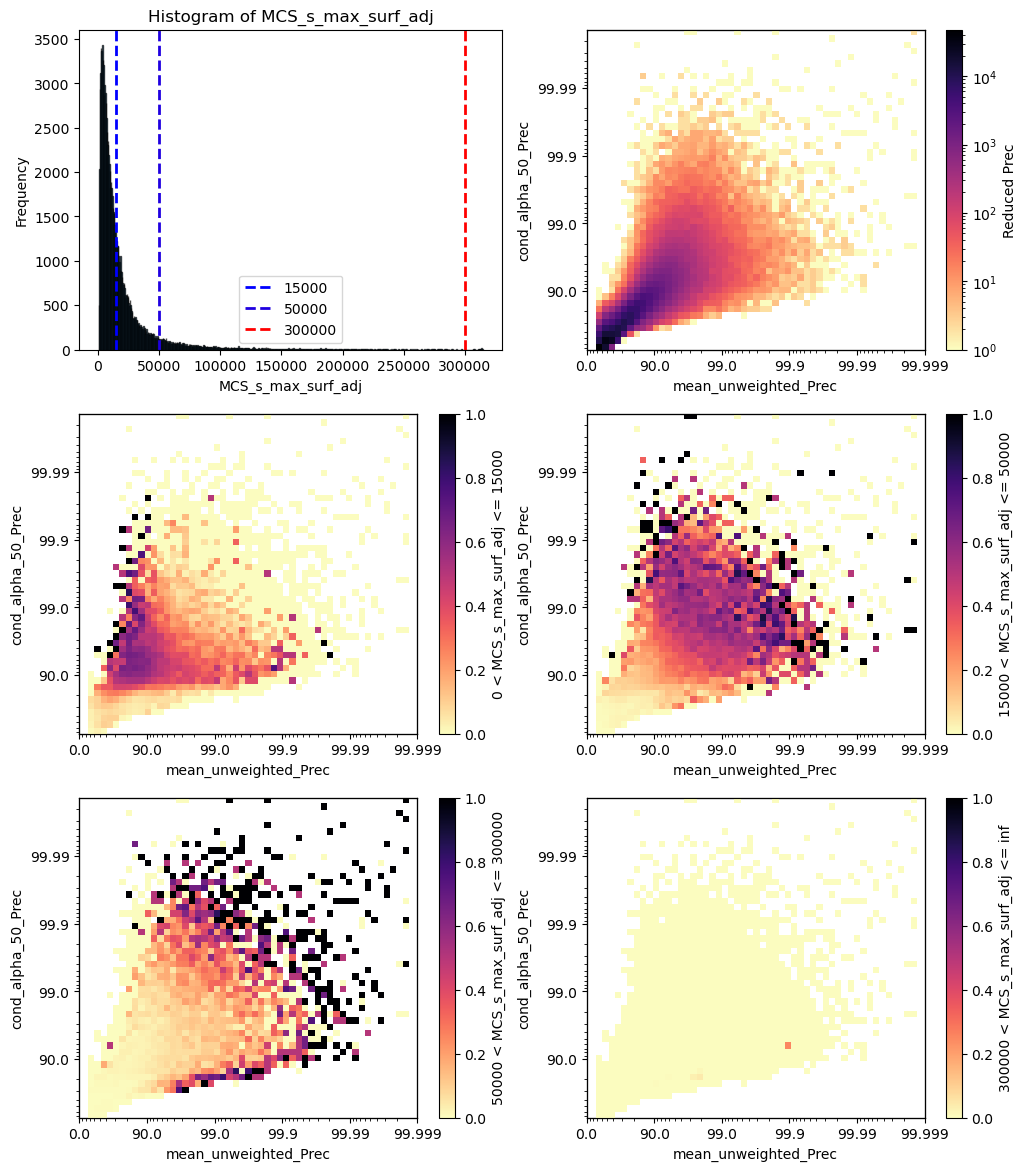

In [ ]:
%matplotlib inline
var = "s_max_surf_adj"
var_cond_list = [0, 15000,  50000, 300000, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## With frobenius norm on rel_surfaces vector but there was not much difference with linear weigthing

In [ ]:
# jd.add_mcs_var_from_labels("growth_rate", norm_rel_surf = 'fro')
# jd.add_mcs_var_from_labels("norm_growth_rate", norm_rel_surf = 'fro')
# jd.add_mcs_var_from_labels("s_max", norm_rel_surf = 'fro')

In [ ]:
# %matplotlib inline
# var = "growth_rate_surf_fro_adj"
# # var_cond_list = [0, 1000, 2000, 3000, 4000, 5000, 6000, 8000, 10000, 15000, 20000]
# var_cond_list = [0, 2000, 5000, 20000, np.inf]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")


In [ ]:
# %matplotlib inline
# var = "norm_growth_rate_surf_fro_adj"
# var_cond_list = [0, 0.08, 0.12, 0.16, 0.24, 0.32,  0.5,  1]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

In [ ]:
# %matplotlib inline
# var = "s_max_surf_fro_adj"
# var_cond_list = [0, 15000,  50000, 300000, np.inf]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

# Stationnary time of classic MCS

Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 1.34 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.96 seconds


/home/mcarenso/code/tempest/tempest/joint_distrib.py:718: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


(<AxesSubplot:xlabel='mean_unweighted_Prec', ylabel='cond_alpha_50_Prec'>,
 <matplotlib.colorbar.Colorbar at 0x153d61691910>)

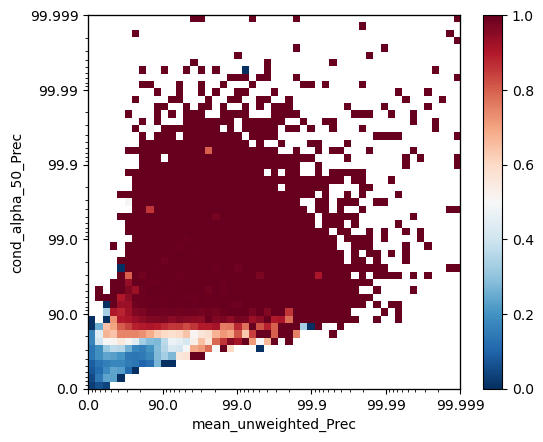

In [ ]:
## Load storms 
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)

%matplotlib inline 

data, noise, count = jd.get_mcs_bin_fraction(region_mask = None, bin_noise_treshold= 0)
jd.plot_data(data, noise, vbds = (0,1))

In [18]:
# import xarray as xr

# ds_mcs = gr.get_var_id_ds("MCS_label")
# grid_surf = gr.grid_surface
# caracteric_length = np.sqrt(grid_surf)*1000*np.sqrt(2)
# caracteristic_time = caracteric_length[:,:,np.newaxis]/ds_mcs.vavg_surf_adj
# duration_seconds = ds_mcs.duration_surf_adj*7200
# stationary_time = xr.where(duration_seconds>caracteristic_time, caracteristic_time, duration_seconds)
# ds_mcs["stationary_time"]=stationary_time
# file_mcs = gr.get_var_ds_file("MCS_label")
# import os 
# os.remove(file_mcs)
# ds_mcs.to_netcdf(file_mcs)

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


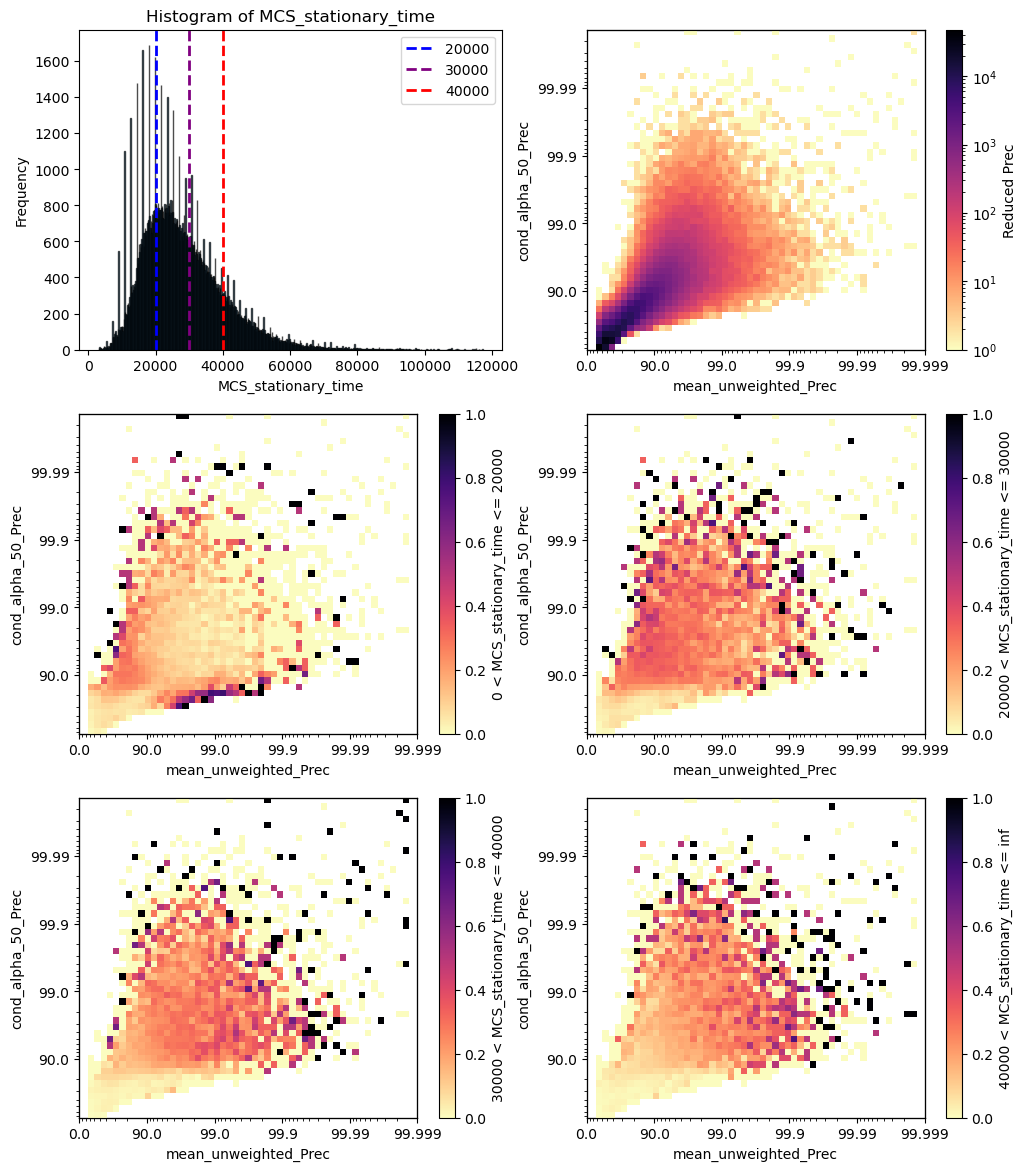

In [19]:
%matplotlib inline
var = "stationary_time"
var_cond_list = [0, 20000, 30000, 40000, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

vavg gives no signal

/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


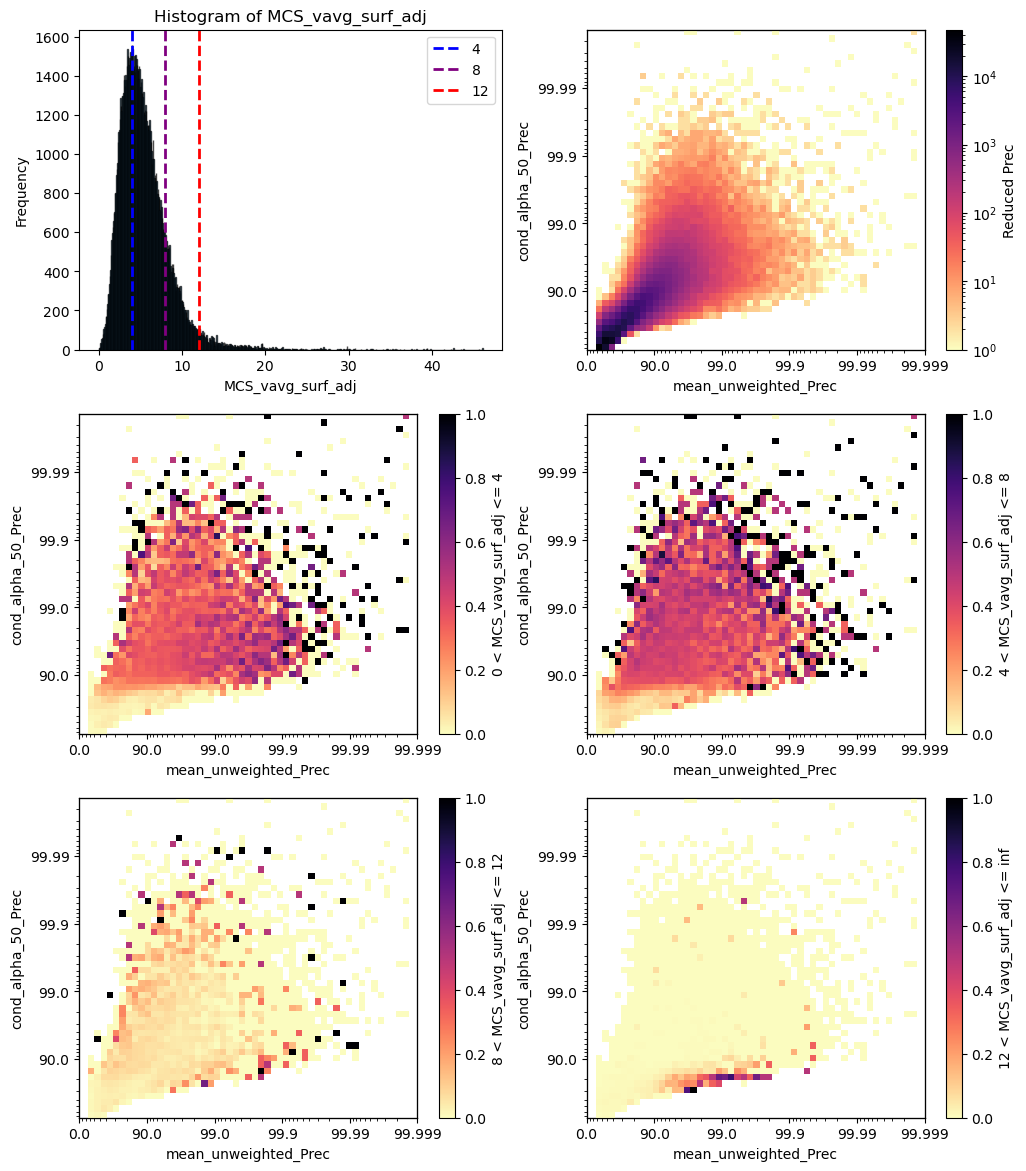

In [20]:
%matplotlib inline
var = "vavg_surf_adj"
var_cond_list = [0, 4, 8, 12, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

### duration has clear signal scaling with both extremes

/home/mcarenso/code/tempest/tempest/plots/hist.py:28: RuntimeWarning: invalid value encountered in scalar divide
  cf = (bar - min_bar)/(max_bar - min_bar)
/home/mcarenso/code/tempest/tempest/joint_distrib.py:919: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, norm=norm, vbds = (0, 1), fig = fig, ax = ax, label = label)


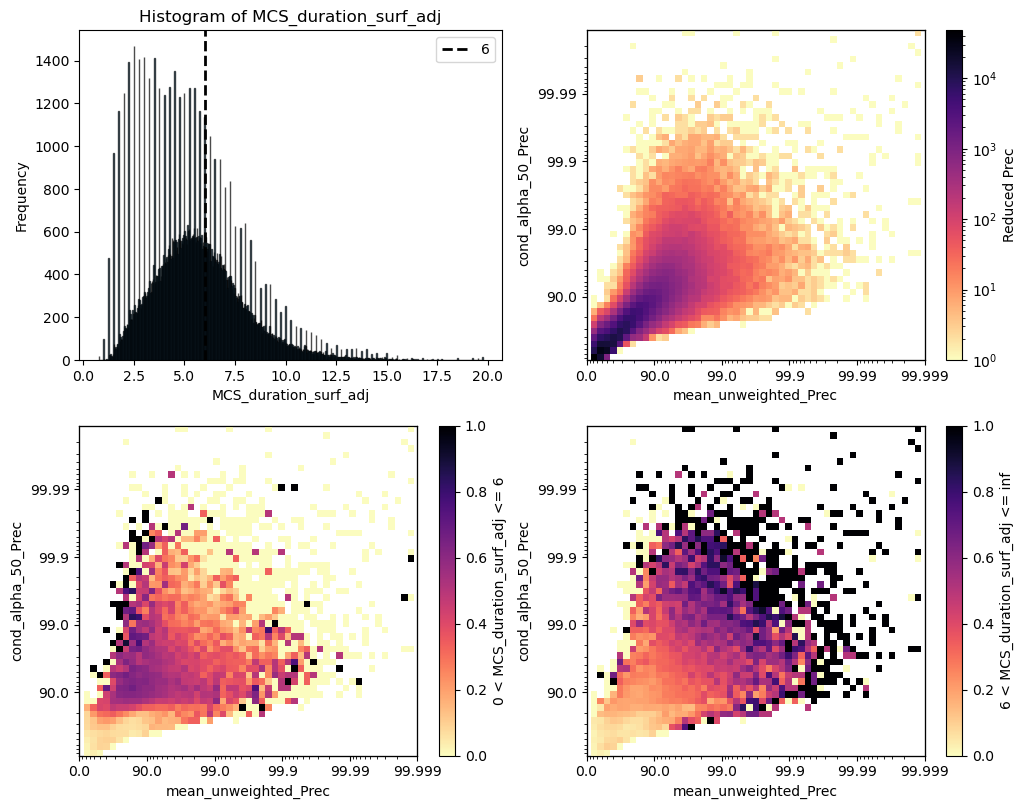

In [21]:
%matplotlib inline
var = "duration_surf_adj"
var_cond_list = [0, 6, np.inf]
cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## Effective duration fields give no signal

In [22]:
# ds_mcs = gr.get_var_id_ds("MCS_label")
# grid_surf = gr.grid_surface
# caracteric_length = np.sqrt(grid_surf)*1000*np.sqrt(2)
# effective_duration = caracteric_length[:,:,np.newaxis]/ds_mcs.vavg_surf_adj
# effective_duration.where(np.isinf(effective_duration))==np.nan
# ds_mcs["effective_duration"]=effective_duration
# dims = ds_mcs.effective_duration.dims
# data_with_nan = np.where(np.isinf(ds_mcs.effective_duration.values) | (ds_mcs.effective_duration.values > 1e6), np.nan, ds_mcs.effective_duration.values)
# ds_mcs['effective_duration'] = (dims, data_with_nan)
# file_mcs = gr.get_var_ds_file("MCS_label")
# import os 
# os.remove(file_mcs)
# ds_mcs.to_netcdf(file_mcs)

In [23]:
# %matplotlib inline
# var = "effective_duration"
# var_cond_list = [0, 20000, 50000, 1e6, np.inf]
# cond, tot = jd.process_plot_var_cond_reducing_prec(var_id = var, var_cond_list = var_cond_list, mask = True, func = "MCS")

## Alternative plot 

In [84]:
def plot_bincount_weighted_mcs_var(jd, var_id_mcs, extreme_category, color): 
    
    if extreme_category == "km":
        assert jd.st_label_var_id == 'Conv_MCS_label'
        var_mcs = gr.get_var_id_ds("Conv_MCS_label")[var_id_mcs]
        weight = jd.prec.Treshold_cond_alpha_50_Prec.values
        mask_yxt = jd.get_mask_yxt_from_mask_jdist(jd.mask_coloc_c_90)
    elif extreme_category == "cg":
        assert jd.st_label_var_id == 'MCS_label'
        var_mcs = gr.get_var_id_ds("MCS_label")[var_id_mcs]
        weight = jd.prec.Sigma_cond_alpha_50_Prec.values
        mask_yxt = jd.get_mask_yxt_from_mask_jdist(jd.mask_coloc_ac_90)

    # Binning approach
    num_bins = 20
    percentiles = np.linspace(0, 100, num_bins+1)  # Generates 21 values from 0% to 100%
    bin_edges = np.nanpercentile(var_mcs, percentiles)
    bin_indices = np.digitize(var_mcs, bin_edges)  # Assign growth_rate values to bins
    # weight = np.full_like(weight, 1)
    # Calculating weighted average and variance for True elements in each bin
    weighted_averages_bin = []
    weighted_variances_bin = []
    for i in range(1, num_bins + 1):
        mask = (bin_indices == i)  # True elements in the current bin
        if weight[mask].sum() > 0:  # Avoid division by zero
            weighted_avg = np.average(mask_yxt[mask], weights=weight[mask])
            # Calculate weighted variance
            weighted_variance = np.average((mask_yxt[mask] - weighted_avg)**2, weights=weight[mask])
        else:
            weighted_avg = np.nan  # If no True elements or sum of weights is 0, set as NaN
            weighted_variance = np.nan
        weighted_averages_bin.append(weighted_avg)
        weighted_variances_bin.append(weighted_variance)

    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # Create a subplot figure
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(bin_centers, weighted_averages_bin, marker='o', linestyle='-', color=color, label='Weighted Average')
    ax.errorbar(bin_centers, weighted_averages_bin, yerr=weighted_variances_bin, fmt='o', color=color, ecolor=color, alpha=0.5, elinewidth=3, capsize=0, label='Variance')

    # # Setting the title and labels
    # ax.set_title(r'Average and Variance of mostly coarse-grained weighted by $\sigma_\alpha$ for regridded MCS stationary time')
    # ax.set_xlabel('Stationary time $(s)$')
    # ax.set_ylabel('Weighted Average')

    # Setting the x-axis to log scale
    ax.set_xscale('log')

    # Enabling grid
    ax.grid(True)

    # Adding a legend
    ax.legend()

    # Show the plot
    fig_name = f"{extreme_category}_{var_id_mcs}"
    plt.savefig(fig_name+".png")
    plt.show()

## for s_max_surf_adj : first load conv_mcs

In [85]:
## Load storms that are in convective phase
st = storm_tracker.StormTracker(gr, label_var_id = "Conv_MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)
jd.make_mask()

Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 2.01 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.96 seconds


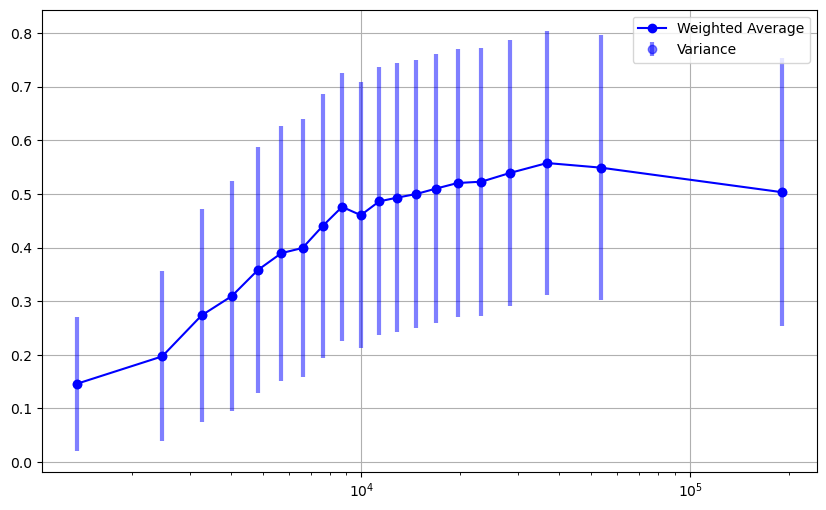

In [86]:
plot_bincount_weighted_mcs_var(jd, "s_max_surf_adj", extreme_category = "km", color = 'b')

## alternative plot for growth_rate : 

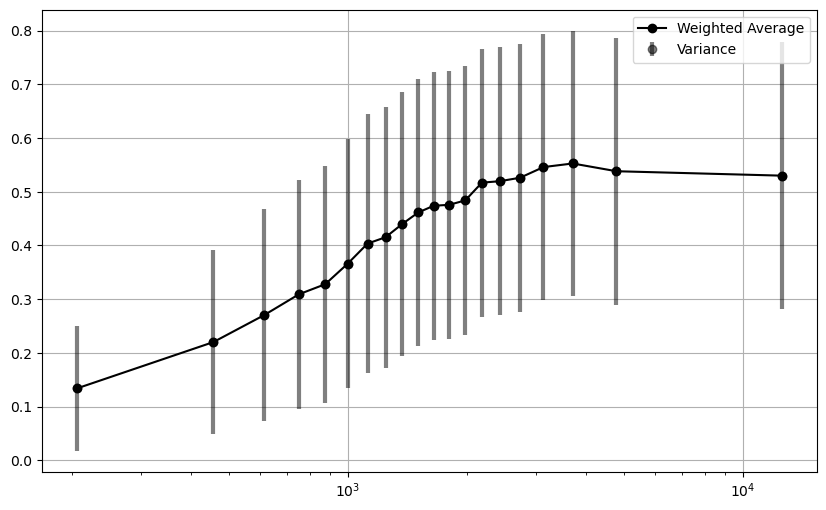

In [87]:
plot_bincount_weighted_mcs_var(jd, " ", extreme_category = "km", color = 'k')

In [75]:
# plot_bincount_weighted_mcs_var(jd, "stationary_time", extreme_category = "km") TODO make stationary time for conv_mcs

## Alternative plot for stationnary time

In [76]:
## Load storms that are in convective phase
st = storm_tracker.StormTracker(gr, label_var_id = "MCS_label", overwrite = False)
jd = joint_distrib.JointDistribution(gr, st, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_50_Prec", nd=5, overwrite = True, dist_mask = ocean)
jd.make_mask()

Loading storms...
loading storms from netcdf
Time elapsed for loading storms: 0.51 seconds
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.93 seconds


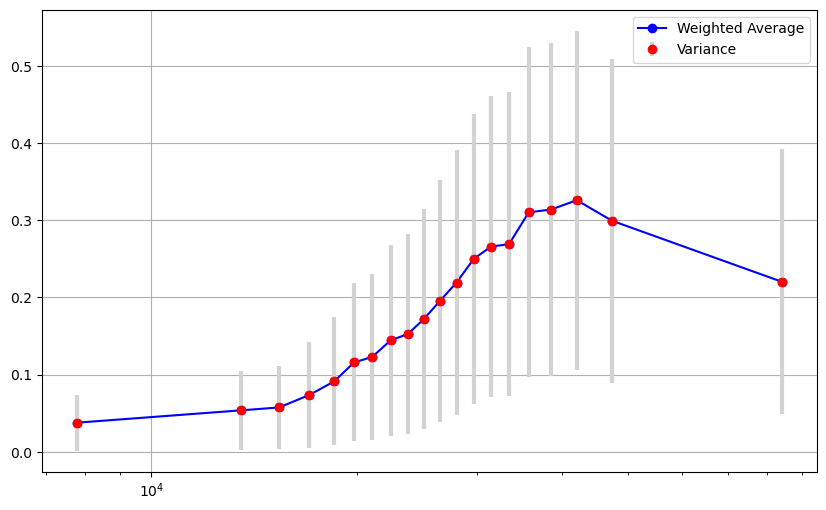

In [77]:
plot_bincount_weighted_mcs_var(jd, "stationary_time", extreme_category="cg")

In [36]:
stationary_time = gr.get_var_id_ds("MCS_label").stationary_time.values
weight = jd.prec.Treshold_cond_alpha_50_Prec.values
mask_yxt = jd.get_mask_yxt_from_mask_jdist(jd.mask_coloc_c_90)

In [40]:
# Binning approach
num_bins = 20
percentiles = np.linspace(0, 100, num_bins+1)  # Generates 21 values from 0% to 100%
bin_edges = np.nanpercentile(stationary_time, percentiles)
bin_indices = np.digitize(stationary_time, bin_edges)  # Assign growth_rate values to bins
# weight = np.full_like(weight, 1)
# Calculating weighted average and variance for True elements in each bin
weighted_averages_bin = []
weighted_variances_bin = []
for i in range(1, num_bins + 1):
    mask = (bin_indices == i)  # True elements in the current bin
    if weight[mask].sum() > 0:  # Avoid division by zero
        weighted_avg = np.average(mask_yxt[mask], weights=weight[mask])
        # Calculate weighted variance
        weighted_variance = np.average((mask_yxt[mask] - weighted_avg)**2, weights=weight[mask])
    else:
        weighted_avg = np.nan  # If no True elements or sum of weights is 0, set as NaN
        weighted_variance = np.nan
    weighted_averages_bin.append(weighted_avg)
    weighted_variances_bin.append(weighted_variance)
    

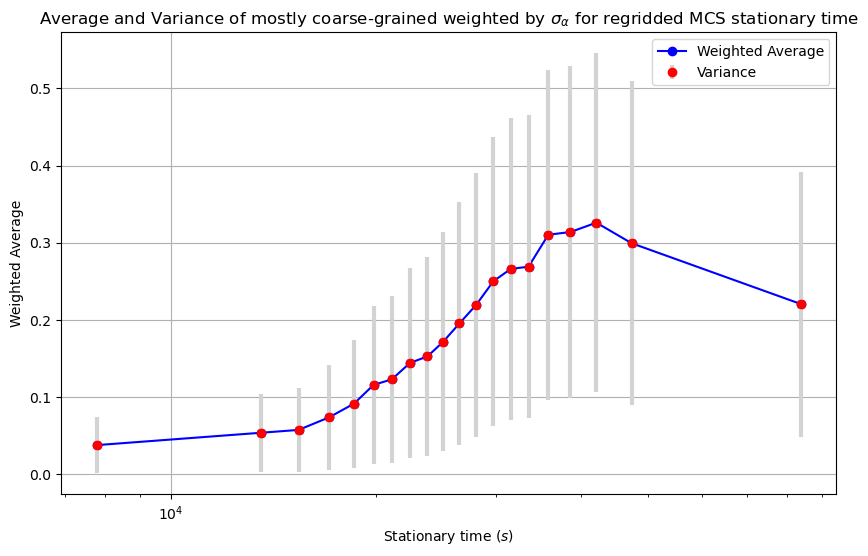

In [41]:
import matplotlib.pyplot as plt

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Create a subplot figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the weighted averages for each bin
ax.plot(bin_centers, weighted_averages_bin, marker='o', linestyle='-', color='b', label='Weighted Average')

# Adding error bars to represent the variance
# Here, the square root of the variance is used to represent the standard deviation as error bars
ax.errorbar(bin_centers, weighted_averages_bin, yerr=weighted_variances_bin, fmt='o', color='r', ecolor='lightgray', elinewidth=3, capsize=0, label='Variance')

# Setting the title and labels
ax.set_title(r'Average and Variance of mostly coarse-grained weighted by $\sigma_\alpha$ for regridded MCS stationary time')
ax.set_xlabel('Stationary time $(s)$')
ax.set_ylabel('Weighted Average')

# Setting the x-axis to log scale
ax.set_xscale('log')

# Enabling grid
ax.grid(True)

# Adding a legend
ax.legend()

# Show the plot
plt.savefig("cg_stationary_time.png")
plt.show()


## difference between conv_mcs and mcs (did the code work ? tho it should)

In [ ]:
st.ds_storms.surfPix_172Wm2[0]
ds_storms = xr.open_dataset(st.file_storms)
storm = ds_storms.isel(label = 10000)
storm

<xarray.Dataset>
Dimensions:              (time: 960)
Coordinates:
    label                int64 162149
  * time                 (time) int64 960 961 962 963 ... 1916 1917 1918 1919
Data variables: (12/71)
    Tmax                 float64 ...
    Utime_End            float64 ...
    Utime_Init           float64 ...
    classif              int64 ...
    classif_JIRAK        float64 ...
    dist                 float64 ...
    ...                   ...
    decay_r_squared      float64 ...
    t0                   float64 ...
    t_max                float64 ...
    t_f                  float64 ...
    s_max                float64 ...
    norm_growth_rate     float64 ...

In [63]:
 storm.surfkm2_172Wm2.values/storm.surfPix_172Wm2.values


NameError: name 'storm' is not defined

In [ ]:
conv_mcs = gr.get_var_id_ds("Conv_MCS_label")
mcs = gr.get_var_id_ds("MCS_label")
conv_rs = conv_mcs.MCS_rel_occupation
rs = mcs.MCS_rel_occupation

In [ ]:
file = gr.get_var_ds_file("MCS_label")
import os 
os.remove(file)

In [ ]:
mcs.to_netcdf(file)